In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Install Packages

In [ ]:
pip install transformers

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 895 kB 44.4 MB/s 
     |████████████████████████████████| 596 kB 45.0 MB/s 
     |████████████████████████████████| 6.5 MB 37.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install nam

     |████████████████████████████████| 527 kB 7.4 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
     |████████████████████████████████| 1.7 MB 42.6 MB/s 
     |████████████████████████████████| 952 kB 44.0 MB/s 
     |████████████████████████████████| 134 kB 48.9 MB/s 
     |████████████████████████████████| 397 kB 49.4 MB/s 
     |████████████████████████████████| 829 kB 44.5 MB/s 
     |████████████████████████████████| 1.1 MB 33.9 MB/s 
     |████████████████████████████████| 271 kB 33.4 MB/s 
     |████████████████████████████████| 94 kB 1.4 MB/s 
     |████████████████████████████████| 144 kB 22.3 MB/s 
     |████████████████████████████████| 144 kB 33.5 MB/s 
     |████████████████████████████████| 181 kB 35.2 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=60043621dbcd9d0e6f66cdc0ca0040ae89d33a70048ca34346d0f8b1527a50f1
  Stored in directory: /root/.cache/pip/whe

In [ ]:
import pandas as pd
import numpy as np
import gzip
from PIL import Image
import matplotlib.pyplot as plt
#import descartes
import requests
from io import BytesIO
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch


#from shapely.geometry import Point, Polygon

import seaborn as sns

from transformers import pipeline

#import folium
#from folium.plugins import FastMarkerCluster
#from branca.colormap import LinearColormap

In [ ]:
from torchvision import transforms
import pandas as pd
import numpy as np
import gzip
from PIL import Image
import matplotlib.pyplot as plt
#import descartes
import requests
from io import BytesIO
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch

from PIL import Image
import requests
from io import BytesIO
import matplotlib.image as mpimg
from tqdm import tqdm

import seaborn as sns

#from shapely.geometry import Point, Polygon

import seaborn as sns

from transformers import pipeline
from sklearn.model_selection import train_test_split
#import folium
#from folium.plugins import FastMarkerCluster
#from branca.colormap import LinearColormap

In [ ]:
import os
import fastprogress
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader, random_split, Subset, TensorDataset
from sklearn.model_selection import train_test_split

##Get Device

In [ ]:
def get_device(cuda_preference=True):
    """Gets pytorch device object. If cuda_preference=True and
        cuda is available on your system, returns a cuda device.

    Args:
        cuda_preference: bool, default True
            Set to true if you would like to get a cuda device

    Returns: pytorch device object
            Pytorch device
    """

    print("cuda available:", torch.cuda.is_available())
    print("cudnn available:", torch.backends.cudnn.is_available())
    print("num devices:", torch.cuda.device_count())

    device = torch.device(
        "cuda:0" if cuda_preference and torch.cuda.is_available() else "cpu"
    )
    print("Using device", device)
    return device
    

In [ ]:
device = get_device()

cuda available: True
cudnn available: True
num devices: 1
Using device cuda:0


##Read Data

In [ ]:
#loading the data
listings = pd.read_csv("drive/MyDrive/listings.csv")
listings_detailed = pd.read_csv("drive/MyDrive/listings.csv.gz")
#listings = pd.read_csv("listings.csv")

In [ ]:
listings_detailed.head()

id  ... reviews_per_month
0   197677  ...              1.49
1   776070  ...              2.31
2  1196177  ...              0.97
3  1249571  ...              1.46
4  1298200  ...              3.72

[5 rows x 74 columns]

In [ ]:
listings.head()

id  ...     license
0   197677  ...  M130003350
1   776070  ...  M130000243
2  1196177  ...  M130007760
3  1249571  ...  M130000957
4  1298200  ...  M130009943

[5 rows x 18 columns]

In [ ]:
# lets first drop all 0 prices as they are probably faulty
listings = listings[listings["price"] != 0]
listings.shape

(10388, 18)

In [ ]:
listings[["price", "neighbourhood", "number_of_reviews"]].groupby(
    ["neighbourhood"]
).mean().round(1).sort_values(by="price", ascending=False)

In [ ]:
plt.hist(listings["price"], bins=50)
plt.show()

In [ ]:
plt.hist(np.log(listings["price"]), bins=50)
plt.show()

In [ ]:
import scipy

_, bins, _ = plt.hist(np.log(listings["price"]), 50, density=1, alpha=0.7)
mu, sigma = scipy.stats.norm.fit(np.log(listings["price"]))
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)

In [ ]:
_, bins, _ = plt.hist(np.log(listings["price"]), 50, density=1, alpha=0.7)
mu, loc, scale = scipy.stats.invgauss.fit(np.log(listings["price"]))
best_fit_line = scipy.stats.invgauss.pdf(bins, mu, loc, scale)
plt.plot(bins, best_fit_line)
print(mu, loc, scale)


# Data
Das hier ist der Datensatz, den wir für die Analyse benutzen, ich hab die ID schon eingefügt.


In [ ]:
namdat = listings[["id", "price", "latitude", "longitude", "minimum_nights", "reviews_per_month", "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm", "room_type"]]
namdat["price"] = np.log(namdat["price"])
namdat = namdat[namdat['minimum_nights'] <= 100]
namdat = namdat[namdat['number_of_reviews_ltm']<=200]

#namdat["minimum_nights"] = np.log(namdat["minimum_nights"])
#namdat["reviews_per_month"] = np.log(namdat["reviews_per_month"])
#namdat["calculated_host_listings_count"] = np.log(namdat["calculated_host_listings_count"])
namdat = pd.get_dummies(namdat)
namdat.head()

namdat = namdat.dropna()
namdat.to_csv("drive/MyDrive/namdat.csv")
#namdat.to_csv("namdat.csv")

namdat.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(8271, 13)

In [ ]:
namdat = namdat.reset_index()

In [ ]:
namdat = namdat.iloc[:,1:]

In [ ]:
namdat.shape

(8271, 13)

In [ ]:
listings_small = listings_detailed.loc[:,["id","price", "picture_url", "host_picture_url"]]

In [ ]:
namdat_images = namdat.loc[:,"id"]
namdat_images = pd.concat([namdat_images, listings_small], axis=1, join="inner")
namdat_images = namdat_images.iloc[:,1:]
namdat_images.head()

id       price                                        picture_url  \
0   197677  $11,000.00  https://a0.muscache.com/pictures/38437056/d27f...   
1   776070   $7,950.00  https://a0.muscache.com/pictures/efd9f039-dbd2...   
2  1196177   $3,000.00  https://a0.muscache.com/pictures/72890882/05ec...   
3  1249571  $32,571.00  https://a0.muscache.com/pictures/d37dbd4c-dcb6...   
4  1298200  $11,286.00  https://a0.muscache.com/pictures/97555979/877f...   

                                    host_picture_url  
0  https://a0.muscache.com/im/users/964081/profil...  
1  https://a0.muscache.com/im/pictures/user/ba6d4...  
2  https://a0.muscache.com/im/users/5686404/profi...  
3  https://a0.muscache.com/im/pictures/user/4876f...  
4  https://a0.muscache.com/im/pictures/user/913d2...

In [ ]:
namdat_images.shape

(8271, 4)

In [ ]:
namdat.head()

id      price  latitude  longitude  minimum_nights  reviews_per_month  \
0   197677   9.305651  35.71707  139.82608               3               1.49   
1   776070   8.980927  35.73844  139.76917               3               2.31   
2  1196177   8.006368  35.74475  139.79731               2               0.97   
3  1249571  10.391178  35.65111  139.72165               4               1.46   
4  1298200   9.331318  35.73850  139.85167               4               3.72   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               363                      0   
1                               1               245                      0   
2                               1                88                      0   
3                               1               320                      1   
4                               2               183                      0   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
0                          1                     0                       0   
1                          0                     0                       1   
2                          0                     0                       1   
3                          1                     0                       0   
4                          1                     0                       0   

   room_type_Shared room  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [ ]:
namdat["room_type_Shared room"].sum()/len(namdat)

0.031556039173014146

#Scrape Images

In [ ]:
namdat_images.shape

(8271, 4)

In [ ]:
pictures_flat = []
fail = []

for i in tqdm(range(len(namdat_images))):

    # retrieve image from url
    

    response_flat = requests.get(namdat_images["picture_url"][i])

    # resize images so they all have the same size

    try:
      img_flat = Image.open(BytesIO(response_flat.content)).resize([64, 64])
    
    except:
      fail.append(i)
      namdat_images = namdat_images.drop([i])
      
      pass

    # normalize (divide by maximum pixel value (255))
    img_flat =  np.array(img_flat) / 255.0
    

    #Convert to tensor

    #img_flat = convert_tensor(img_flat)
   
    
    try:
        # check shape for nn input
      if img_flat.shape != ( 64, 64, 3):
          img_flat = img_flat[:, :, 0:3]
          
         
        # append the images to the created empty lists
      pictures_flat.append(img_flat)
            
    except IndexError:
        namdat_images = namdat_images.drop([i])

100%|██████████| 8271/8271 [38:37<00:00,  3.57it/s]


In [ ]:
namdat_images.to_csv("namdat_images")

In [ ]:
namdat_images2 = pd.DataFrame(np.empty(8266))

In [ ]:
train_images_flat = np.asarray(pictures_flat)

In [ ]:
namdat_images2["pictures_flat"] = pictures_flat

In [ ]:
namdat_images2 = namdat_images2.drop(namdat_images2.index[[fail]],axis = 0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [ ]:
train_images_flat = (list(namdat_images2["pictures_flat"]))

In [ ]:
train_images_flat = np.asarray(train_images_flat)


In [ ]:
np.save("train_images_flat.npy", train_images_flat)

(8271, 4)

In [ ]:
namdat_images["train_images_flat"] = list(namdat_images2["pictures_flat"])

ValueError: ignored

In [ ]:
namdat_images.to_csv("data_full")

In [ ]:
convert_tensor = transforms.ToTensor()

In [ ]:
train_images_flat_tensor = []
for i in range(len(train_images_flat)): 
  train_images_flat_tensor.append(convert_tensor(train_images_flat[i]))

In [ ]:
namdat_images.to_csv("data_full")


# Concat data

In [ ]:
#import

In [ ]:
namdat_images = pd.read_csv("/content/drive/MyDrive/data_full")

In [ ]:
images = np.load("/content/drive/MyDrive/train_images_flat.npy")

In [ ]:
namdat_images["train_images_flat"] = list(images)

In [ ]:
namdat_images = namdat_images.iloc[:,1:]

In [ ]:
namdat_images = namdat_images.iloc[:,[0,4]]

In [ ]:
namdat_images.head()

id                                  train_images_flat
0   197677  [[[0.7568627450980392, 0.7058823529411765, 0.6...
1   776070  [[[0.6823529411764706, 0.6666666666666666, 0.6...
2  1196177  [[[0.08627450980392157, 0.08627450980392157, 0...
3  1249571  [[[0.8196078431372549, 0.8274509803921568, 0.7...
4  1298200  [[[0.11372549019607843, 0.12941176470588237, 0...

In [ ]:
namdat = pd.concat([namdat.set_index('id'),namdat_images.set_index('id')], axis=1, join='inner').reset_index()

In [ ]:
namdat.shape

(7078, 14)

In [ ]:
namdat.to_csv("namdat.csv")

In [ ]:
namdat.iloc[:,1:].head()

price  latitude  ...  room_type_Private room  room_type_Shared room
0   9.305651  35.71707  ...                       0                      0
1   8.980927  35.73844  ...                       1                      0
2   8.006368  35.74475  ...                       1                      0
3  10.391178  35.65111  ...                       0                      0
4   9.331318  35.73850  ...                       0                      0

[5 rows x 12 columns]

#Stop

In [ ]:
plot_data_x = namdat.iloc[:,2:-1]
plot_data_y = namdat.iloc[:,1]

In [ ]:
len(plot_data_y)

14

# Data Plots

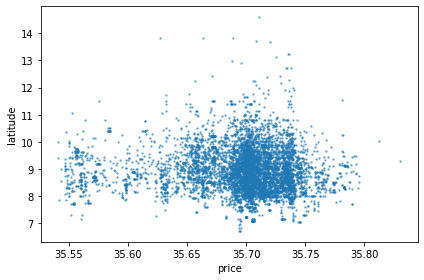

In [ ]:
fig, axis = plt.subplots()
axis.scatter(plot_data_x.iloc[:,0],plot_data_y, s = 2, alpha = 0.5)
axis.set_xlabel("price")
axis.set_ylabel(plot_data.columns[0])
  
fig.tight_layout()


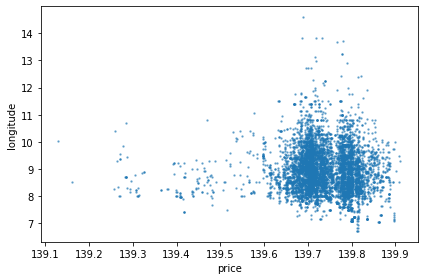

In [ ]:
fig, axis = plt.subplots()
axis.scatter(plot_data_x.iloc[:,1],plot_data_y, s = 2, alpha = 0.5)
axis.set_xlabel("price")
axis.set_ylabel(plot_data.columns[1])
  
fig.tight_layout()

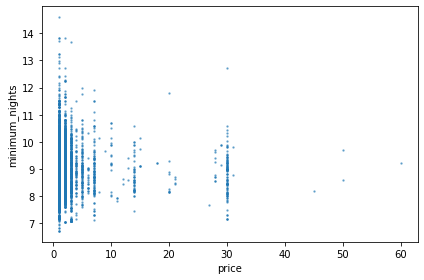

In [ ]:
fig, axis = plt.subplots()
axis.scatter(plot_data_x.iloc[:,2],plot_data_y, s = 2, alpha = 0.5)
axis.set_xlabel("price")
axis.set_ylabel(plot_data.columns[2])
  
fig.tight_layout()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.boxplot(data)

In [ ]:
plot_data_roomtype =plot_data_x.iloc[:, -4:]
plot_data_roomtype[np.where(plot_data_roomtype[1] = 1),1] = 2

In [ ]:
plot_data_roomtype[np.where(plot_data_roomtype.iloc[:,1] = 1),1] = 2

SyntaxError: ignored

In [ ]:
np.where(plot_data_roomtype.iloc[:,1] = 1)

SyntaxError: ignored

In [ ]:
plot_data_roomtype.tail()

room_type_Entire home/apt  ...  room_type_Shared room
7073                          1  ...                      0
7074                          1  ...                      0
7075                          1  ...                      0
7076                          1  ...                      0
7077                          1  ...                      0

[5 rows x 4 columns]

In [ ]:
#namdat = listings[["price", "latitude", "longitude", "minimum_nights", "reviews_per_month", "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm", "room_type"]]
#namdat["price"] = np.log(namdat["price"])
#namdat["room_type"] = namdat["room_type"].astype('O')
#namdat = namdat.dropna()
#num_feat_df = namdat.iloc[:,1:-2]
#scaler = MinMaxScaler((-1,1))
#scaler = StandardScaler()
#num_feat_arr = scaler.fit_transform(num_feat_df)
#num_feat = pd.DataFrame(num_feat_arr)
#num_feat.columns = num_feat_df.columns
#num_feat.head()

#full_df = pd.concat([namdat["price"], num_feat, namdat["room_type"]], axis = 1)
#full_df = pd.get_dummies(full_df)

#full_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


price  latitude  ...  room_type_Private room  room_type_Shared room
0   9.305651  0.498757  ...                       0                      0
1   8.980927  1.003314  ...                       1                      0
2   8.006368  1.152296  ...                       1                      0
3  10.391178 -1.058594  ...                       0                      0
4   9.331318  1.004730  ...                       0                      0

[5 rows x 11 columns]

In [ ]:
#namdat = pd.DataFrame(full_df)
#namdat.head()

price  latitude  ...  room_type_Private room  room_type_Shared room
0   9.305651  0.498757  ...                       0                      0
1   8.980927  1.003314  ...                       1                      0
2   8.006368  1.152296  ...                       1                      0
3  10.391178 -1.058594  ...                       0                      0
4   9.331318  1.004730  ...                       0                      0

[5 rows x 11 columns]

# Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
trainset, testset = train_test_split(namdat, test_size= 0.2, random_state= 1866)
trainset, valset = train_test_split(trainset, test_size = 0.2, random_state = 42)


In [ ]:
trainset.replace([np.inf, -np.inf], np.nan, inplace=True)
trainset.dropna(inplace = True)
testset.replace([np.inf, -np.inf], np.nan, inplace=True)
testset.dropna(inplace = True)

In [ ]:
np.isinf(trainset).sum()
trainset.isna().sum()

id                                0
price                             0
latitude                          0
longitude                         0
minimum_nights                    0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
room_type_Entire home/apt         0
room_type_Hotel room              0
room_type_Private room            0
room_type_Shared room             0
dtype: int64

In [ ]:
x2 = sm.add_constant(trainset.iloc[:,2:])
linmodel = sm.OLS(trainset.iloc[:,1],x2.iloc[:,:-1])
linmodel2 = linmodel.fit()
print(linmodel2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     47.59
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.08e-91
Time:                        16:37:53   Log-Likelihood:                -6158.6
No. Observations:                5292   AIC:                         1.234e+04
Df Residuals:                    5281   BIC:                         1.241e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#mean prediction
y_test = np.array(testset.iloc[:,1])
y_train = np.array(trainset.iloc[:,1])
meanpred_mae = 1/len(y_test) * np.sum(np.abs(np.mean(y_train) - y_test))
print(meanpred_mae)

0.6196297636087338


In [ ]:
x_test = sm.add_constant(testset.iloc[:,2:])
y_preds = linmodel2.predict(x_test.iloc[:,:-1])
y_test = testset.iloc[:,1]

linmod_mae = 1/len(y_preds) * np.sum(np.abs(y_preds - y_test))

print(linmod_mae)

0.5957684826300527


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#NAM Packages

In [ ]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

from nam.config import defaults
from nam.data import FoldedDataset
from nam.data import NAMDataset, CSVDataset
from nam.models import NAM
from nam.models import get_num_units
from nam.trainer import LitNAM
from nam.types import Config
from nam.utils import parse_args
from nam.utils import plot_mean_feature_importance
from nam.utils import plot_nams

#Config Datei für das NAM

In [ ]:
config = defaults()

In [ ]:
#config.data_path = "drive/MyDrive/namdat.csv"
config.data_path = "namdat.csv"
config.regression = True
config.num_epochs = 150
config.lr = 0.003
config.output_regularization = 0
config.l2_regularization = 0
config.dropout = 0
config.hidden_sizes = [100,32]
config.batch_size = 1024
config.feature_dropout = 0.1
config.early_stopping_patience = 15
config.device = device
config.activation = "exu"
print(config)

Config(activation='exu', batch_size=1024, cross_val=False, data_path='namdat.csv', decay_rate=0.995, device=device(type='cuda', index=0), dropout=0, early_stopping_patience=15, experiment_name='NAM', feature_dropout=0.1, fold_num=1, hidden_sizes=[100, 32], l2_regularization=0, logdir='output', lr=0.003, num_basis_functions=1000, num_epochs=150, num_folds=5, num_models=1, num_splits=3, num_workers=16, optimizer='adam', output_regularization=0, regression=True, save_model_frequency=2, save_top_k=3, seed=2021, shuffle=True, units_multiplier=2, use_dnn=False, wandb=True)


# Transform to NAMDataset

In [ ]:
data = NAMDataset(config,
                  data_path = "drive/MyDrive/namdat.csv",
                  features_columns = namdat.columns[2:],
                  targets_column = namdat.columns[1])
dataloaders = data.train_dataloaders()

In [ ]:


#data = NAMDataset(config,
 #                 data_path = "drive/MyDrive/namdat.csv",
  #                features_columns = namdat.columns[1:],
   #               targets_column = namdat.columns[0])
data = NAMDataset(config,
                  data_path = "drive/MyDrive/namdat.csv",
                  features_columns = namdat.columns[2:-1],
                  targets_column = namdat.columns[1])

dataloaders = data.train_dataloaders()

In [ ]:
data.features


tensor([[ 0.2159,  0.7814, -0.9322,  ..., -1.0000, -1.0000, -1.0000],
        [ 0.3634,  0.6359, -0.9322,  ..., -1.0000,  1.0000, -1.0000],
        [ 0.4070,  0.7078, -0.9661,  ..., -1.0000,  1.0000, -1.0000],
        ...,
        [-0.0965,  0.5269, -0.9661,  ..., -1.0000, -1.0000, -1.0000],
        [-0.5238,  0.5058, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-0.5238,  0.5058, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],
       device='cuda:0')

# Model setup

In [ ]:
model = NAM(
  config=config,
  name="NAM_tokyo",
  num_inputs=len(data[0][0]),
  num_units=get_num_units(config, data.features),
)
model

/usr/local/lib/python3.7/dist-packages/torch/nn/init.py:172: UserWarning: mean is more than 2 std from [a, b] in nn.init.trunc_normal_. The distribution of values may be incorrect.
  return _no_grad_trunc_normal_(tensor, mean, std, a, b)


NAM(
  (dropout): Dropout(p=0, inplace=False)
  (feature_nns): ModuleList(
    (0): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=1000)
        (1): LinReLU(in_features=1000, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3): Linear(in_features=32, out_features=1, bias=True)
      )
    )
    (1): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=1000)
        (1): LinReLU(in_features=1000, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3): Linear(in_features=32, out_features=1, bias=True)
      )
    )
    (2): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=52)
        (1): LinReLU(in_features=52, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3

# Model Training

In [ ]:
for fold, (trainloader, valloader) in enumerate(dataloaders):

    tb_logger = TensorBoardLogger(save_dir=config.logdir,
                                name=f'{model.name}',
                                version=f'fold_{fold + 1}')

    checkpoint_callback = ModelCheckpoint(filename=tb_logger.log_dir +
                                        "/{epoch:02d}-{val_loss:.4f}",
                                        monitor='val_loss',
                                        save_top_k=config.save_top_k,
                                        mode='min')

    litmodel = LitNAM(config, model)
    trainer = pl.Trainer(logger=tb_logger,
                       max_epochs=config.num_epochs,
                       checkpoint_callback=checkpoint_callback,
                       gpus = 0)
    trainer.fit(litmodel,
              train_dataloader=trainloader,
              val_dataloaders=valloader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:148: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=<pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7f81b165e8d0>)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=<pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7f81b165e8d0>)`.
  f"Setting `Trainer(checkpoint_callback={checkpoint_callback})` is deprecated in v1.5 and will "
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1585: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`."
/usr/local/lib/python3.7/dist-packag

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:433: UserWarning: The number of training samples (6) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
trainer.test(test_dataloaders=data.test_dataloaders())

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:907: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1399: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at output/NAM_tokyo/fold_1/checkpoints/epoch=149-step=899-v1.ckpt
Loaded model weights from checkpoint at output/NAM_tokyo/fold_1/checkpoints/epoch=149-step=899-v1.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'MAE_metric': 0.5779145359992981,
 'MAE_metric_epoch': 0.5779145359992981,
 'test_loss': 0.5636783838272095,
 'test_loss_epoch': 0.5636783838272095}
--------------------------------------------------------------------------------


[{'MAE_metric': 0.5779145359992981,
  'MAE_metric_epoch': 0.5779145359992981,
  'test_loss': 0.5636783838272095,
  'test_loss_epoch': 0.5636783838272095}]

# Model diagnostics plot

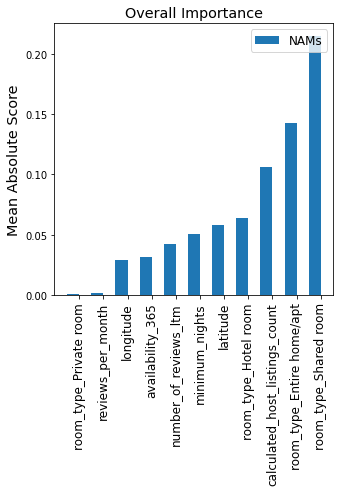

In [ ]:
fig1 = plot_mean_feature_importance(litmodel.model, dataset = data)

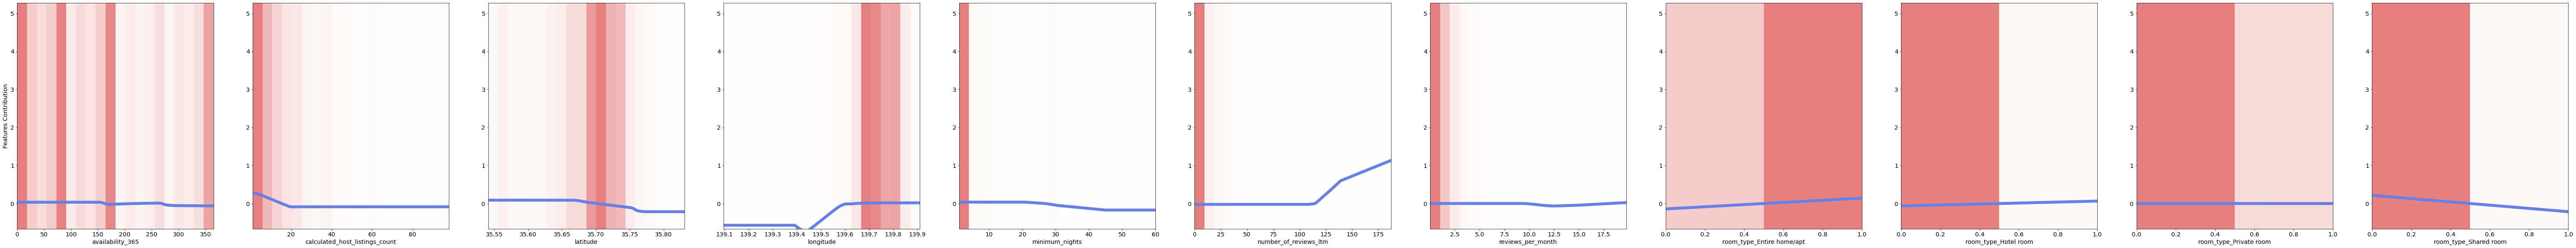

In [ ]:
litmodel = litmodel.to(device = device)
fig2 = plot_nams(litmodel.model, dataset = data,num_cols = 11)

# significant nam
Das hier benutzen wir nur für das NAM mit den signifikanten Variablen aus dem Linearen Modell

In [ ]:
signam = namdat[["price", "latitude", "minimum_nights", "calculated_host_listings_count", "availability_365", "room_type_Entire home/apt",
                 "room_type_Hotel room", "room_type_Private room", "room_type_Shared room"]]

In [ ]:
sigdata = NAMDataset(config,
                  data_path = "drive/MyDrive/namdat.csv",
                  features_columns = signam.columns[1:],
                  targets_column = signam.columns[0])

dataloaders = sigdata.train_dataloaders()

In [ ]:
config.num_epochs = 100

In [ ]:
sigmodel = NAM(
  config=config,
  name="NAM_tokyo",
  num_inputs=len(sigdata[0][0]),
  num_units=get_num_units(config, sigdata.features),
)
sigmodel

/usr/local/lib/python3.7/dist-packages/torch/nn/init.py:172: UserWarning: mean is more than 2 std from [a, b] in nn.init.trunc_normal_. The distribution of values may be incorrect.
  return _no_grad_trunc_normal_(tensor, mean, std, a, b)


NAM(
  (dropout): Dropout(p=0, inplace=False)
  (feature_nns): ModuleList(
    (0): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=1000)
        (1): LinReLU(in_features=1000, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3): Linear(in_features=32, out_features=1, bias=True)
      )
    )
    (1): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=52)
        (1): LinReLU(in_features=52, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3): Linear(in_features=32, out_features=1, bias=True)
      )
    )
    (2): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=88)
        (1): LinReLU(in_features=88, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3): L

In [ ]:
for fold, (trainloader, valloader) in enumerate(dataloaders):

    tb_logger = TensorBoardLogger(save_dir=config.logdir,
                                name=f'{sigmodel.name}',
                                version=f'fold_{fold + 1}')

    checkpoint_callback = ModelCheckpoint(filename=tb_logger.log_dir +
                                        "/{epoch:02d}-{val_loss:.4f}",
                                        monitor='val_loss',
                                        save_top_k=config.save_top_k,
                                        mode='min')

    litmodel = LitNAM(config, sigmodel)
    trainer = pl.Trainer(logger=tb_logger,
                       max_epochs=config.num_epochs,
                       checkpoint_callback=checkpoint_callback,
                       gpus = 0)
    trainer.fit(litmodel,
              train_dataloader=trainloader,
              val_dataloaders=valloader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:148: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=<pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7f8c014bac90>)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=<pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7f8c014bac90>)`.
  f"Setting `Trainer(checkpoint_callback={checkpoint_callback})` is deprecated in v1.5 and will "
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1585: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`."
/usr/local/lib/python3.7/dist-packag

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:433: UserWarning: The number of training samples (6) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
trainer.test(test_dataloaders=sigdata.test_dataloaders())

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:907: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1399: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at output/NAM_tokyo/fold_1/checkpoints/epoch=99-step=599.ckpt
Loaded model weights from checkpoint at output/NAM_tokyo/fold_1/checkpoints/epoch=99-step=599.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'MAE_metric': 0.6196439862251282,
 'MAE_metric_epoch': 0.6196439862251282,
 'test_loss': 0.6147165894508362,
 'test_loss_epoch': 0.6147165894508362}
--------------------------------------------------------------------------------


[{'MAE_metric': 0.6196439862251282,
  'MAE_metric_epoch': 0.6196439862251282,
  'test_loss': 0.6147165894508362,
  'test_loss_epoch': 0.6147165894508362}]

# Nam ohne dummies
Das hier ist für das NAM mit den Daten ohne die Dummy Variablen

In [ ]:
nonroomdat = namdat[["price", "latitude", "longitude", "minimum_nights", "reviews_per_month",
                     "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm"]]

In [ ]:
nonroomdata = NAMDataset(config,
                  data_path = "drive/MyDrive/namdat.csv",
                  features_columns = nonroomdat.columns[1:],
                  targets_column = nonroomdat.columns[0])

dataloaders = nonroomdata.train_dataloaders()

In [ ]:
nonroommodel = NAM(
  config=config,
  name="NAM_tokyo",
  num_inputs=len(nonroomdata[0][0]),
  num_units=get_num_units(config, nonroomdata.features),
)
nonroommodel

/usr/local/lib/python3.7/dist-packages/torch/nn/init.py:172: UserWarning: mean is more than 2 std from [a, b] in nn.init.trunc_normal_. The distribution of values may be incorrect.
  return _no_grad_trunc_normal_(tensor, mean, std, a, b)


NAM(
  (dropout): Dropout(p=0, inplace=False)
  (feature_nns): ModuleList(
    (0): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=1000)
        (1): LinReLU(in_features=1000, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3): Linear(in_features=32, out_features=1, bias=True)
      )
    )
    (1): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=1000)
        (1): LinReLU(in_features=1000, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3): Linear(in_features=32, out_features=1, bias=True)
      )
    )
    (2): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=52)
        (1): LinReLU(in_features=52, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3

In [ ]:
for fold, (trainloader, valloader) in enumerate(dataloaders):

    tb_logger = TensorBoardLogger(save_dir=config.logdir,
                                name=f'{nonroommodel.name}',
                                version=f'fold_{fold + 1}')

    checkpoint_callback = ModelCheckpoint(filename=tb_logger.log_dir +
                                        "/{epoch:02d}-{val_loss:.4f}",
                                        monitor='val_loss',
                                        save_top_k=config.save_top_k,
                                        mode='min')

    litmodel = LitNAM(config, nonroommodel)
    trainer = pl.Trainer(logger=tb_logger,
                       max_epochs=config.num_epochs,
                       checkpoint_callback=checkpoint_callback,
                       gpus = 0)
    trainer.fit(litmodel,
              train_dataloader=trainloader,
              val_dataloaders=valloader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:148: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=<pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7f8c00e750d0>)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=<pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7f8c00e750d0>)`.
  f"Setting `Trainer(checkpoint_callback={checkpoint_callback})` is deprecated in v1.5 and will "
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1585: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`."
/usr/local/lib/python3.7/dist-packag

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:433: UserWarning: The number of training samples (6) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
trainer.test(test_dataloaders=nonroomdata.test_dataloaders())

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:907: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1399: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at output/NAM_tokyo/fold_1/checkpoints/epoch=99-step=599-v1.ckpt
Loaded model weights from checkpoint at output/NAM_tokyo/fold_1/checkpoints/epoch=99-step=599-v1.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'MAE_metric': 0.6236796379089355,
 'MAE_metric_epoch': 0.6236796379089355,
 'test_loss': 0.6256593465805054,
 'test_loss_epoch': 0.6256593465805054}
--------------------------------------------------------------------------------


[{'MAE_metric': 0.6236796379089355,
  'MAE_metric_epoch': 0.6236796379089355,
  'test_loss': 0.6256593465805054,
  'test_loss_epoch': 0.6256593465805054}]

In [ ]:
pip install fastprogress

In [ ]:
pip install torchvision

# Packages Custom Train Function

In [ ]:
import os
import fastprogress
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader, random_split, Subset, TensorDataset
from sklearn.model_selection import train_test_split

# Create Datasplit

In [ ]:
trainset, testset = train_test_split(namdat, test_size= 0.2, random_state= 1866)
trainset, valset = train_test_split(trainset, test_size = 0.2, random_state = 42)


In [ ]:
def generate_train_test_data_split(dataset, split_seed=42, test_frac=0.2):

    num_test_samples = np.ceil(test_frac * len(dataset)).astype(int)
    num_train_samples = len(dataset) - num_test_samples
    trainset, testset = random_split(
        dataset=dataset,
        lengths=(num_train_samples, num_test_samples),
        generator=torch.Generator().manual_seed(split_seed),
    )
    return trainset, testset



def generate_train_val_data_split(trainset, split_seed=42, val_frac=0.2):

    num_val_samples = np.ceil(val_frac * len(trainset)).astype(int)
    num_train_samples = len(trainset) - num_val_samples
    trainset, valset = random_split(
        dataset=trainset,
        lengths=(num_train_samples, num_val_samples),
        generator=torch.Generator().manual_seed(split_seed),
    )
    return trainset, valset

def init_data_loaders(trainset, valset, testset, batch_size=1024):

    trainloader = DataLoader(
        trainset,
        batch_size=batch_size,
        shuffle=True,
    )

    valloader = DataLoader(
        valset,
        batch_size=batch_size,
        shuffle=True,
    )

    testloader = DataLoader(
        testset,
        batch_size=batch_size,
        shuffle=False,
    )
    return trainloader, valloader, testloader

## Define Dataloaders

In [ ]:


trainset = TensorDataset(torch.from_numpy(trainset.iloc[:,2:-1].to_numpy()), 
                         torch.from_numpy(trainset.iloc[:,1].to_numpy()), torch.from_numpy(np.asarray(list(trainset.iloc[:,-1]))).permute(0,3,1,2))
valset = TensorDataset(torch.from_numpy(valset.iloc[:,2:-1].to_numpy()), 
                       torch.from_numpy(valset.iloc[:,1].to_numpy()), torch.from_numpy(np.asarray(list(valset.iloc[:,-1]))).permute(0,3,1,2))
testset = TensorDataset(torch.from_numpy(testset.iloc[:,2:-1].to_numpy()), 
                        torch.from_numpy(testset.iloc[:,1].to_numpy()), torch.from_numpy(np.asarray(list(testset.iloc[:,-1]))).permute(0,3,1,2))


trainloader, valloader, testloader = init_data_loaders(trainset, valset, testset, batch_size = 128)


# Custom Train Function

## Train NAM

In [ ]:
def train(dataloader, optimizer, model, loss_fn, device, master_bar):

    epoch_loss = []
    

    for x, y,_ in fastprogress.progress_bar(dataloader, parent=master_bar):
        optimizer.zero_grad()
        model.train()

        # Forward pass
        y_pred,_ = model(x.to(device).double())
        y_pred = y_pred.view(-1)
        y = y.clone().detach().double()
        y= y.view(-1)
        
        
        # Compute loss
        loss = loss_fn(y_pred, y.to(device))

        # Backward pass
        loss.backward()
        optimizer.step()

        # For plotting the train loss, save it for each sample
        epoch_loss.append(loss.item())


    return np.mean(epoch_loss)


def validate(dataloader, model, loss_fn, device, master_bar):

    epoch_loss = []
    epoch_mae, epoch_total = 0, 0
      

    model.eval()
    with torch.no_grad():
        for x, y,_ in fastprogress.progress_bar(dataloader, parent=master_bar):
            # make a prediction on validation set
            y_pred,_ = model(x.to(device).double())
            y = y.clone().detach().double()
            
            y_pred = y_pred.view(-1)
            y= y.view(-1)


            #MAE metric
            epoch_mae += MAE_metric(y_pred,y.to(device))
            epoch_total += len(y)


            # Compute loss
            loss = loss_fn(y_pred, y.to(device))

            # For plotting the train loss, save it for each sample
            epoch_loss.append(loss.item())


    return np.mean(epoch_loss), epoch_mae/epoch_total


def run_training(model, optimizer, loss_function, device, num_epochs, 
                train_dataloader, val_dataloader, early_stopper=None, verbose=False):

    start_time = time.time()
    master_bar = fastprogress.master_bar(range(num_epochs))
    train_losses, val_losses, val_mae = [],[],[]
    model = model.double()
    
    for epoch in master_bar:
        
        # Train the model
        epoch_train_loss = train(train_dataloader, optimizer, model, 
                                 loss_function, device, master_bar)
        # Validate the model
        epoch_val_loss, epoch_val_mae= validate(val_dataloader, 
                                                model, loss_function, 
                                                device, master_bar)

        # Save loss and acc for plotting
        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        val_mae.append(epoch_val_mae)
        
        
        if verbose:
            master_bar.write(f'Train loss: {epoch_train_loss:.2f}, val loss: {epoch_val_loss:.2f}, val mae {epoch_val_mae:.3f}')
            
        if early_stopper:



            early_stopper.update(epoch_val_mae,model)
            
            if early_stopper.early_stop:
                model.load_state_dict(torch.load(early_stopper.path))
                break

            
    time_elapsed = np.round(time.time() - start_time, 0).astype(int)
    print(f'Finished training after {time_elapsed} seconds.')
    return train_losses, val_losses, val_mae


In [ ]:
def MAE_metric(y_pred, y):
    softpl = nn.Softplus()


    return(torch.sum(torch.abs(y - 1/torch.sqrt(softpl(y_pred)))))





def plot(title, label, train_results, val_results, yscale='linear', save_path=None, 
         extra_pt=None, extra_pt_label=None):

    
    epoch_array = np.arange(len(train_results)) + 1
    train_label, val_label = "Training "+label.lower(), "Validation "+label.lower()
    
    sns.set(style='ticks')

    plt.plot(epoch_array, train_results, epoch_array, val_results, linestyle='dashed', marker='o')
    legend = ['Train results', 'Validation results']
    
    if extra_pt:

        plt.scatter(extra_pt[0], extra_pt[1],c="black", s=100)
        if extra_pt_label:
            plt.text(extra_pt[0], extra_pt[1], extra_pt_label)
 
        
    plt.legend(legend)
    plt.xlabel('Epoch')
    plt.ylabel(label)
    plt.yscale(yscale)
    plt.title(title)
    
    sns.despine(trim=True, offset=5)
    plt.title(title, fontsize=15)
    if save_path:
        plt.savefig(str(save_path), bbox_inches='tight')
    plt.show()

In [ ]:
class EarlyStopper:

    def __init__(self, verbose=False, path='checkpoint.pt', tau = 10):


        self.path = path
        self.verbose = verbose
        self.tau = tau
        self._early_stop = False
        self.epochs = 0
        self.best_epoch = 0
        self.counter = 0
        self.score = None
        self.min = float("inf") 

    @property
    def early_stop(self):

        return self._early_stop


    def update(self, value, model):
        self.epochs +=1

        if value < self.min:
          self.min = value
          self.counter = 0
          self.score=value
          self.best_epoch = self.epochs
          torch.save(model.state_dict(), self.path)
        else:
          self.counter += 1
          if self.counter >= self.tau:
            self._early_stop = True

# Train with Inverse Gaussian

In [ ]:
model = model.to(device)
loss_fn = InvGaussLoss()
optimizer = optim.Adam(params=model.parameters(), lr=config.lr)
es = EarlyStopper(tau = config.early_stopping_patience)

results = run_training(model, optimizer, loss_fn, device, config.num_epochs, 
                trainloader, valloader, early_stopper=es, verbose=True)

KeyboardInterrupt: ignored

# Plot Model Training

In [ ]:
def plot_results(
    train_losses,
    val_losses,
    save_path=None,
    extra_pt=False,
    extra_pt_label=None,
):


    sns.set_theme(style="whitegrid")

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

    epochs = range(1, len(train_losses) + 1)

    ax1.plot(epochs, train_losses, label="Training")
    ax1.plot(epochs, val_losses, label="Validation")
    ax1.set(
        title="Loss",
        xlabel="Epoch",
        ylabel="",
    )



    if extra_pt:
        ax2.scatter(
            np.argmax(val_accs) + 1,
            np.max(val_accs),
            s=40,
            color="black",
            label=extra_pt_label,
            zorder=3,
        )



    fig.tight_layout()
    fig.subplots_adjust(top=0.8)

    sns.despine()

[tensor(14466.8128, device='cuda:0', dtype=torch.float64), tensor(156214.3209, device='cuda:0', dtype=torch.float64), tensor(448501.2535, device='cuda:0', dtype=torch.float64), tensor(708285.1910, device='cuda:0', dtype=torch.float64), tensor(813171.0522, device='cuda:0', dtype=torch.float64), tensor(739683.8594, device='cuda:0', dtype=torch.float64), tensor(581163.4292, device='cuda:0', dtype=torch.float64), tensor(401342.1498, device='cuda:0', dtype=torch.float64), tensor(238257.2515, device='cuda:0', dtype=torch.float64), tensor(117298.1437, device='cuda:0', dtype=torch.float64), tensor(44878.5336, device='cuda:0', dtype=torch.float64), tensor(12529.9991, device='cuda:0', dtype=torch.float64), tensor(2514.9060, device='cuda:0', dtype=torch.float64), tensor(355.0777, device='cuda:0', dtype=torch.float64), tensor(20.1245, device='cuda:0', dtype=torch.float64), tensor(16.7547, device='cuda:0', dtype=torch.float64), tensor(3.7542, device='cuda:0', dtype=torch.float64), tensor(5.4772, de

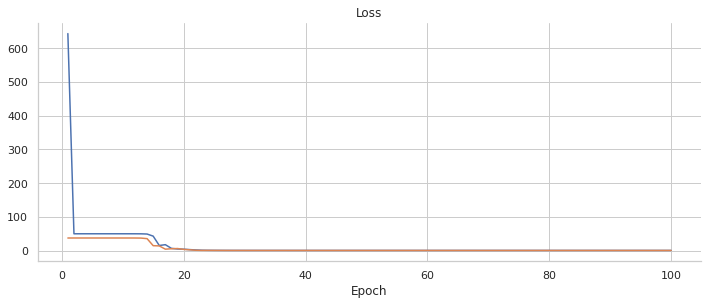

In [ ]:
train_losses, val_losses, val_mae = results
print(val_mae)
plot_results(train_losses, val_losses)

# Custom Inverse Gaussian Loss

In [ ]:
class InvGaussLoss(nn.Module):
  def __init__(self):
    super(InvGaussLoss, self).__init__()
    self.softplus = nn.Softplus()

  def forward(self, inputs, targets):
    inputs = 1/torch.sqrt(self.softplus(inputs))

    inputs = inputs.view(-1)
    targets = targets.view(-1)

    out = torch.sum(torch.square((targets - inputs))/(2*torch.square(inputs) * targets))

    return out

relu, softplus statt abs 

#CNN Images

In [ ]:
y = namdat.iloc[:,1]
y = torch.from_numpy(np.asarray(y))

In [ ]:
x = torch.from_numpy(images)
x = x.permute(0,3,1,2)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)

In [ ]:
trainset = TensorDataset(train_x, train_y)
valset = TensorDataset(val_x, val_y)
testset = TensorDataset(test_x, test_y)

##Architecture

In [ ]:
from nam.config import defaults
from nam.data import FoldedDataset
from nam.data import NAMDataset, CSVDataset
from nam.models import NAM
from nam.models import get_num_units
#from nam.trainer import LitNAM
from nam.types import Config
from nam.utils import parse_args
from nam.utils import plot_mean_feature_importance
from nam.utils import plot_nams

# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [ ]:
config = defaults()

#config.data_path = "drive/MyDrive/namdat.csv"
config.data_path = "namdat.csv"
config.regression = True
config.num_epochs = 100
config.lr = 0.0003
config.output_regularization = 0
config.l2_regularization = 0
config.dropout = 0
config.hidden_sizes = [700,100]
config.batch_size = 1024
config.feature_dropout = 0.1
config.early_stopping_patience = 15
config.device = device
config.activation = "exu"
print(config)

Config(activation='exu', batch_size=1024, cross_val=False, data_path='namdat.csv', decay_rate=0.995, device=device(type='cuda', index=0), dropout=0, early_stopping_patience=15, experiment_name='NAM', feature_dropout=0.1, fold_num=1, hidden_sizes=[700, 100], l2_regularization=0, logdir='output', lr=0.0003, num_basis_functions=1000, num_epochs=100, num_folds=5, num_models=1, num_splits=3, num_workers=16, optimizer='adam', output_regularization=0, regression=True, save_model_frequency=2, save_top_k=3, seed=2021, shuffle=True, units_multiplier=2, use_dnn=False, wandb=True)


In [ ]:
def init_data_loaders(trainset, valset, testset, batch_size=1024):

    trainloader = DataLoader(
        trainset,
        batch_size=batch_size,
        shuffle=True,
    )

    valloader = DataLoader(
        valset,
        batch_size=batch_size,
        shuffle=True,
    )

    testloader = DataLoader(
        testset,
        batch_size=batch_size,
        shuffle=False,
    )
    return trainloader, valloader, testloader

In [ ]:
trainloader, valloader, testloader = init_data_loaders(trainset, valset, testset, batch_size = 128)

In [ ]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, 32, kernel_size=5, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            
            # Defining another 2D convolution layer
            Conv2d(32, 64, kernel_size=5, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),

            # Defining another 2D convolution layer
            Conv2d(64, 64, kernel_size=5, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        
            # Defining another 2D convolution layer
            Conv2d(64, 128, kernel_size=5, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        
        )
    
        self.flatten = nn.Flatten(start_dim = 1)
        self.linear_layers = Sequential(
            Linear(512,512),
            ReLU(inplace=True),
            Linear(512,1)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = self.flatten(x)
        x = self.linear_layers(x)
        return x

## Train CNN

In [ ]:
def MAE_metric(y_pred, y):

    return(torch.sum(torch.abs(y - (y_pred))))


def train_cnn(dataloader, optimizer, model, loss_fn, device, master_bar):

    epoch_loss = []
    

    for _, y,x in fastprogress.progress_bar(dataloader, parent=master_bar):
        optimizer.zero_grad()
        model.train()

        # Forward pass
        y_pred = model(x.to(device).double())
        y = y.clone().detach().double()
        
        new_shape = (len(y), 1)
        y = y.view(new_shape)
        
        # Compute loss
        loss = loss_fn(y_pred, y.to(device))

        # Backward pass
        loss.backward()
        optimizer.step()

        # For plotting the train loss, save it for each sample
        epoch_loss.append(loss.item())

   
    return np.mean(epoch_loss)


def validate_cnn(dataloader, model, loss_fn, device, master_bar):

    epoch_loss = []
    epoch_mae, epoch_total = 0, 0
      

    model.eval()
    with torch.no_grad():
        for _, y, x in fastprogress.progress_bar(dataloader, parent=master_bar):
            # make a prediction on validation set
            y_pred = model(x.to(device).double())
            y = y.clone().detach().double()


            new_shape = (len(y), 1)
            y = y.view(new_shape)
            #MAE metric
            epoch_mae += MAE_metric(y_pred,y.to(device))
            epoch_total += len(y)


            # Compute loss
            loss = loss_fn(y_pred, y.to(device))

            # For plotting the train loss, save it for each sample
            epoch_loss.append(loss.item())

    return np.mean(epoch_loss), epoch_mae/epoch_total


def run_training_cnn(model, optimizer, loss_function, device, num_epochs, 
                train_dataloader, val_dataloader, early_stopper=None, verbose=False):

    start_time = time.time()
    master_bar = fastprogress.master_bar(range(num_epochs))
    train_losses, val_losses, val_mae = [],[],[]
    model = model.double()
    
    for epoch in master_bar:
        
        # Train the model
        epoch_train_loss = train_cnn(train_dataloader, optimizer, model, 
                                 loss_function, device, master_bar)
        # Validate the model
        epoch_val_loss, epoch_val_mae= validate_cnn(val_dataloader, 
                                                model, loss_function, 
                                                device, master_bar)

        # Save loss and acc for plotting
        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        val_mae.append(epoch_val_mae)
        
        
        if verbose:
            master_bar.write(f'Train loss: {epoch_train_loss:.2f}, val loss: {epoch_val_loss:.2f}, val mae {epoch_val_mae:.3f}')
            
        if early_stopper:



            early_stopper.update(epoch_val_mae,model)
            
            if early_stopper.early_stop:
                model.load_state_dict(torch.load(early_stopper.path))
                break

            
    time_elapsed = np.round(time.time() - start_time, 0).astype(int)
    print(f'Finished training after {time_elapsed} seconds.')
    return train_losses, val_losses, val_mae


def plot(title, label, train_results, val_results, yscale='linear', save_path=None, 
         extra_pt=None, extra_pt_label=None):

    
    epoch_array = np.arange(len(train_results)) + 1
    train_label, val_label = "Training "+label.lower(), "Validation "+label.lower()
    
    sns.set(style='ticks')

    plt.plot(epoch_array, train_results, epoch_array, val_results, linestyle='dashed', marker='o')
    legend = ['Train results', 'Validation results']
    
    if extra_pt:

        plt.scatter(extra_pt[0], extra_pt[1],c="black", s=100)
        if extra_pt_label:
            plt.text(extra_pt[0], extra_pt[1], extra_pt_label)

        
    plt.legend(legend)
    plt.xlabel('Epoch')
    plt.ylabel(label)
    plt.yscale(yscale)
    plt.title(title)
    
    sns.despine(trim=True, offset=5)
    plt.title(title, fontsize=15)
    if save_path:
        plt.savefig(str(save_path), bbox_inches='tight')
    plt.show()

##Train

In [ ]:
model = Net()
model = model.to(device)
loss_fn = F.mse_loss
optimizer = optim.Adam(params=model.parameters(), lr=0.003)

results = run_training_cnn(model, optimizer, loss_fn, device, 100,
                trainloader, valloader, early_stopper = es,verbose=True)


Finished training after 786 seconds.


# Ensemble model for NAM and Convnet


In [ ]:
class ConvNAM(nn.Module):
    def __init__(self, NAM, CNN):
      super(ConvNAM, self).__init__()
      self.nam = NAM
      self.cnn = CNN
    
      self.alpha = nn.Parameter(torch.randn(1))
      self.alpha.requires_grad = True
    
      self.beta = nn.Parameter(torch.randn(1))
      self.beta.requires_grad = True

    def forward(self, x, z):
      x,_ = self.nam(x)
      x =  x.view(-1)
      z = self.cnn(z)
      z = z.view(-1)
      q = self.alpha * x + self.beta * z

      return q

## Train Ensemble

In [ ]:
def MAE_metric(y_pred, y):
    return(torch.sum(torch.abs(y - (y_pred))))

def train_ensemble(dataloader, optimizer, model, loss_fn, device, master_bar):

    epoch_loss = []
    

    for x, y, z in fastprogress.progress_bar(dataloader, parent=master_bar):
        optimizer.zero_grad()
        model.train()

        # Forward pass
        y_pred = model(x.to(device).double(), z.to(device).double())
        y = y.clone().detach().double()

        
        
        # Compute loss
        loss = loss_fn(y_pred, y.to(device))

        # Backward pass
        loss.backward()
        optimizer.step()

        # For plotting the train loss, save it for each sample
        epoch_loss.append(loss.item())

   
    return np.mean(epoch_loss)


def validate_ensemble(dataloader, model, loss_fn, device, master_bar):

    epoch_loss = []
    epoch_mae, epoch_total = 0, 0
      

    model.eval()
    with torch.no_grad():
        for x, y, z in fastprogress.progress_bar(dataloader, parent=master_bar):
            # make a prediction on validation set
            y_pred = model(x.to(device).double(), z.to(device).double())
            y = y.clone().detach().double()
            #MAE metric
            epoch_mae += MAE_metric(y_pred,y.to(device))
            epoch_total += len(y)


            # Compute loss
            loss = loss_fn(y_pred, y.to(device))

            # For plotting the train loss, save it for each sample
            epoch_loss.append(loss.item())

    return np.mean(epoch_loss), epoch_mae/epoch_total


def run_training_ensemble(model, optimizer, loss_function, device, num_epochs, 
                train_dataloader, val_dataloader, early_stopper=None, verbose=False):

    start_time = time.time()
    master_bar = fastprogress.master_bar(range(num_epochs))
    train_losses, val_losses, val_mae = [],[],[]
    model = model.double()
    
    for epoch in master_bar:
        
        # Train the model
        epoch_train_loss = train_ensemble(train_dataloader, optimizer, model, 
                                 loss_function, device, master_bar)
        # Validate the model
        epoch_val_loss, epoch_val_mae= validate_ensemble(val_dataloader, 
                                                model, loss_function, 
                                                device, master_bar)

        # Save loss and acc for plotting
        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        val_mae.append(epoch_val_mae)
        
        
        if verbose:
            master_bar.write(f'Train loss: {epoch_train_loss:.2f}, val loss: {epoch_val_loss:.2f}, val mae {epoch_val_mae:.3f}')
            
        if early_stopper:

  

            early_stopper.update(epoch_val_mae,model)
            
            if early_stopper.early_stop:
                model.load_state_dict(torch.load(early_stopper.path))
                break
      
            
    time_elapsed = np.round(time.time() - start_time, 0).astype(int)
    print(f'Finished training after {time_elapsed} seconds.')
    return train_losses, val_losses, val_mae


##Train



In [ ]:
cnn = Net()
nam =  NAM(
  config=config,
  name="NAM_tokyo",
  num_inputs=len(data[0][0]),
  num_units=get_num_units(config, data.features),
)
model = ConvNAM(nam,cnn)
model = model.to(device)
loss_fn = F.mse_loss
optimizer = optim.Adam(params=model.parameters(), lr=0.003)
es = EarlyStopper(tau = config.early_stopping_patience)
results = run_training_ensemble(model, optimizer, loss_fn, device, 100,
                trainloader, valloader, early_stopper = es, verbose=True)

/usr/local/lib/python3.7/dist-packages/torch/nn/init.py:172: UserWarning: mean is more than 2 std from [a, b] in nn.init.trunc_normal_. The distribution of values may be incorrect.
  return _no_grad_trunc_normal_(tensor, mean, std, a, b)


Finished training after 593 seconds.


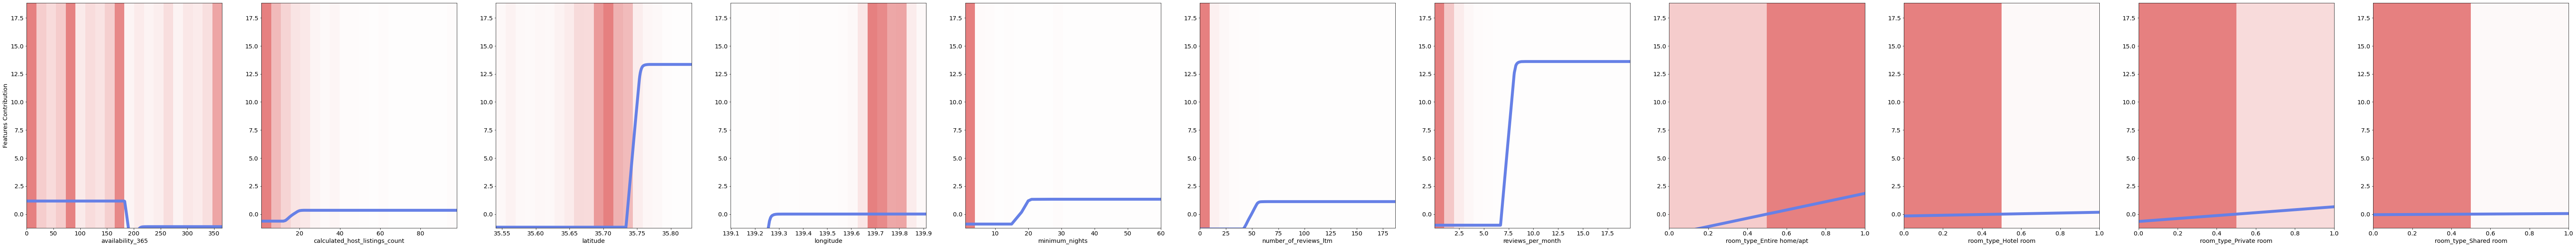

In [ ]:
nam = nam.to(device = device)
fig3 = plot_nams(nam, dataset = data,num_cols = 11)

In [ ]:
def test_ensemble(dataloader, model, loss_fn, device):

    epoch_loss = []
    epoch_mae, epoch_total = 0, 0
      

    model.eval()
    with torch.no_grad():
        for x, y, z in dataloader:
            # make a prediction on validation set
            y_pred = model(x.to(device).double(), z.to(device).double())
            y = y.clone().detach().double()
            #MAE metric
            epoch_mae += MAE_metric(y_pred,y.to(device))
            epoch_total += len(y)


            # Compute loss
            loss = loss_fn(y_pred, y.to(device))

            # For plotting the train loss, save it for each sample
            epoch_loss.append(loss.item())

    return np.mean(epoch_loss), epoch_mae/epoch_total

In [ ]:
test_ensemble(testloader, model, loss_fn, device)

(0.6323933494600579, tensor(0.6022, device='cuda:0', dtype=torch.float64))

In [ ]:
print(model.alpha)
print(model.beta)

Parameter containing:
tensor([0.3713], device='cuda:0', dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([-0.8959], device='cuda:0', dtype=torch.float64, requires_grad=True)


# Ensemble on pre-trained models

## Build and pretrain NAM

In [ ]:
#config.data_path = "drive/MyDrive/namdat.csv"
config.data_path = "namdat.csv"
config.regression = True
config.num_epochs = 150
config.lr = 0.003
config.output_regularization = 0
config.l2_regularization = 0
config.dropout = 0
config.hidden_sizes = [100,32]
config.batch_size = 128
config.feature_dropout = 0.1
config.early_stopping_patience = 50
config.device = device
config.activation = "exu"
print(config)

Config(activation='exu', batch_size=128, cross_val=False, data_path='namdat.csv', decay_rate=0.995, device=device(type='cuda', index=0), dropout=0, early_stopping_patience=50, experiment_name='NAM', feature_dropout=0.1, fold_num=1, hidden_sizes=[100, 32], l2_regularization=0, logdir='output', lr=0.003, num_basis_functions=1000, num_epochs=150, num_folds=5, num_models=1, num_splits=3, num_workers=16, optimizer='adam', output_regularization=0, regression=True, save_model_frequency=2, save_top_k=3, seed=2021, shuffle=True, units_multiplier=2, use_dnn=False, wandb=True)


In [ ]:
prenam = NAM(
  config=config,
  name="NAM_tokyo",
  num_inputs=len(data[0][0]),
  num_units=get_num_units(config, data.features),
)
prenam

/usr/local/lib/python3.7/dist-packages/torch/nn/init.py:172: UserWarning: mean is more than 2 std from [a, b] in nn.init.trunc_normal_. The distribution of values may be incorrect.
  return _no_grad_trunc_normal_(tensor, mean, std, a, b)


NAM(
  (dropout): Dropout(p=0, inplace=False)
  (feature_nns): ModuleList(
    (0): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=1000)
        (1): LinReLU(in_features=1000, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3): Linear(in_features=32, out_features=1, bias=True)
      )
    )
    (1): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=1000)
        (1): LinReLU(in_features=1000, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3): Linear(in_features=32, out_features=1, bias=True)
      )
    )
    (2): FeatureNN(
      (dropout): Dropout(p=0, inplace=False)
      (model): ModuleList(
        (0): ExU(in_features=1, out_features=52)
        (1): LinReLU(in_features=52, out_features=100)
        (2): LinReLU(in_features=100, out_features=32)
        (3

In [ ]:
prenam = prenam.to(device)
loss_fn = F.mse_loss
optimizer = optim.Adam(params=prenam.parameters(), lr=config.lr)
es = EarlyStopper(tau = config.early_stopping_patience)

results = run_training(prenam, optimizer, loss_fn, device, config.num_epochs, 
                trainloader, valloader, early_stopper=es, verbose=True)

Finished training after 85 seconds.


## Build and pretrain CNN

In [ ]:
pre_cnn = Net()
pre_cnn

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_layers): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=

In [ ]:
pre_cnn = pre_cnn.to(device)
loss_fn = F.mse_loss
optimizer = optim.Adam(params=pre_cnn.parameters(), lr=0.003)
es = EarlyStopper(tau = config.early_stopping_patience)

results = run_training_cnn(pre_cnn, optimizer, loss_fn, device, 100,
                trainloader, valloader, early_stopper = es,verbose=True)

Finished training after 895 seconds.


## Build and train ensemble model

In [ ]:
pre_ensemble = ConvNAM(prenam,pre_cnn)
pre_ensemble = pre_ensemble.to(device)

loss_fn = F.mse_loss
optimizer = optim.Adam(params=pre_ensemble.parameters(), lr=0.003)
es = EarlyStopper(tau = config.early_stopping_patience)
results = run_training_ensemble(pre_ensemble, optimizer, loss_fn, device, 100,
                trainloader, valloader, early_stopper = es,verbose=True)

Finished training after 585 seconds.


In [ ]:
print(pre_ensemble.alpha)

Parameter containing:
tensor([0.3170], device='cuda:0', dtype=torch.float64, requires_grad=True)


In [ ]:
print(pre_ensemble.beta)

Parameter containing:
tensor([1.1979], device='cuda:0', dtype=torch.float64, requires_grad=True)


In [ ]:
test_ensemble(testloader, pre_ensemble, loss_fn, device)

(0.6947815411233841, tensor(0.6107, device='cuda:0', dtype=torch.float64))